### Подключение модулей

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import tensorflow as tf
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

Целью этого проекта является прогнозирование и анализ цен продажи жилья в США. Требуется построить регрессионную и нейронную модель для прогнозирования цен на жилье в США на основе различных факторов.



### Загрузка данных

In [5]:
df = pd.read_csv('USA_Housing.csv')

In [10]:
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Данные содержат следующие столбцы:
- __Avg. Area Income__ (Сред. Доход от района): Средний доход жителей города по региону.
- __Avg. Area House Age__ (Сред. Площадь дома): Средний возраст домов в районе.
- __Avg. Area Number of Rooms__ (Сред. Площадь Количество комнат): Среднее количество комнат в домах в том же городе.
- __Avg. Area Number of Bedrooms__ (Сред. Площадь Количество спален): Среднее количество спален в домах в том же городе.
- __Area Population__ (Население региона): Население городского дома, в котором находится.
- __Price__ (Цена): Цена, по которой был продан дом.
- __Address__ (Адрес): Адрес дома.
    

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [10]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [11]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000
mean,68583.1090,5.9772,6.9878,3.9813,36163.5160,1232072.6541
std,10657.9912,0.9915,1.0058,1.2341,9925.6501,353117.6266
min,17796.6312,2.6443,3.2362,2.0000,172.6107,15938.6579
25%,61480.5624,5.3223,6.2993,3.1400,29403.9287,997577.1350
50%,68804.2864,5.9704,7.0029,4.0500,36199.4067,1232669.3780
75%,75783.3387,6.6508,7.6659,4.4900,42861.2908,1471210.2042
max,107701.7484,9.5191,10.7596,6.5000,69621.7134,2469065.5942


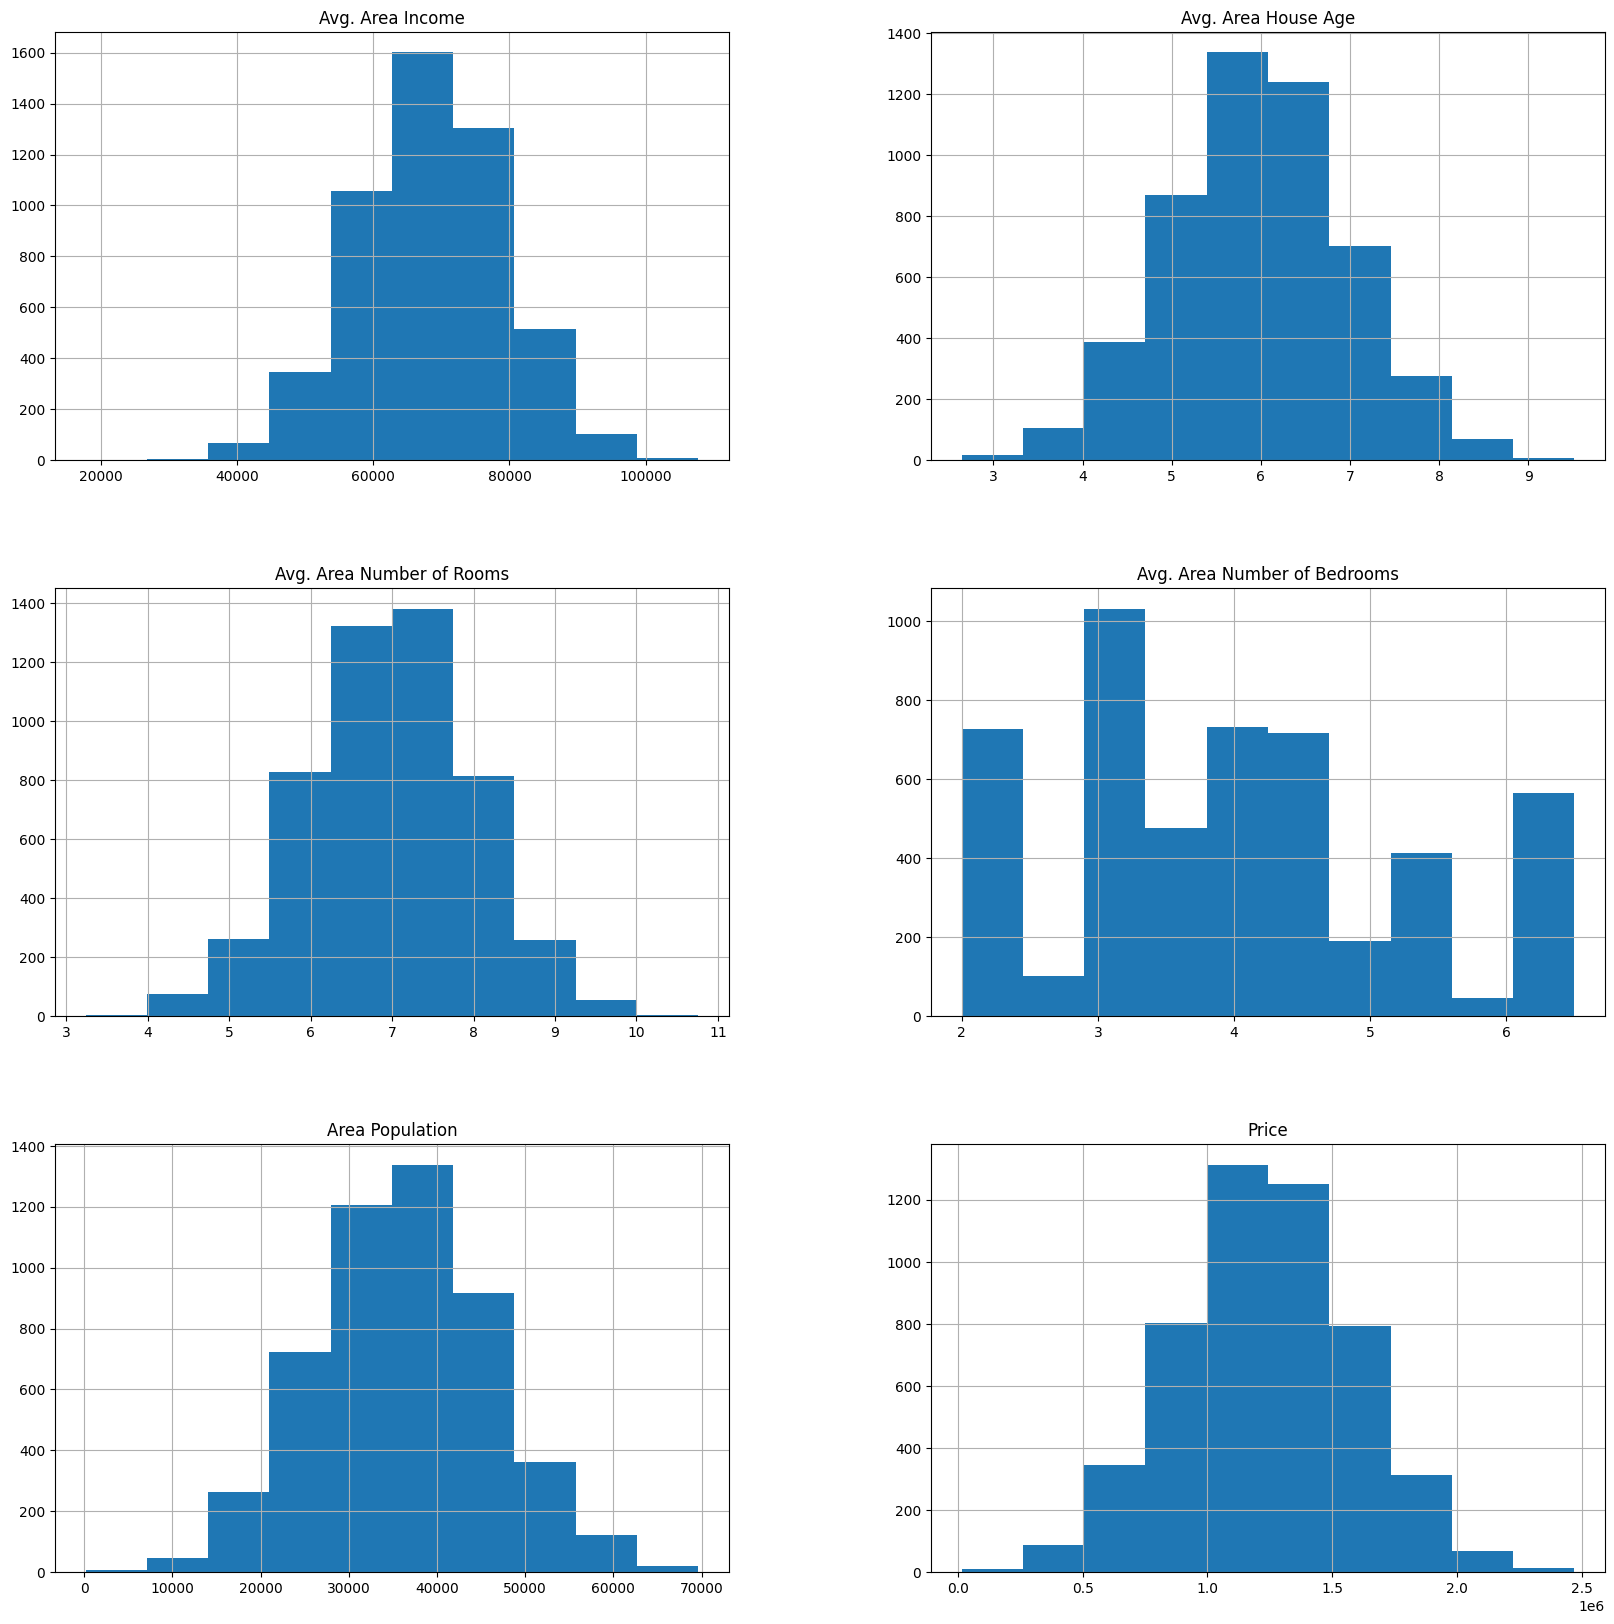

In [12]:
df.hist(figsize=(20,20));

<Figure size 800x600 with 0 Axes>

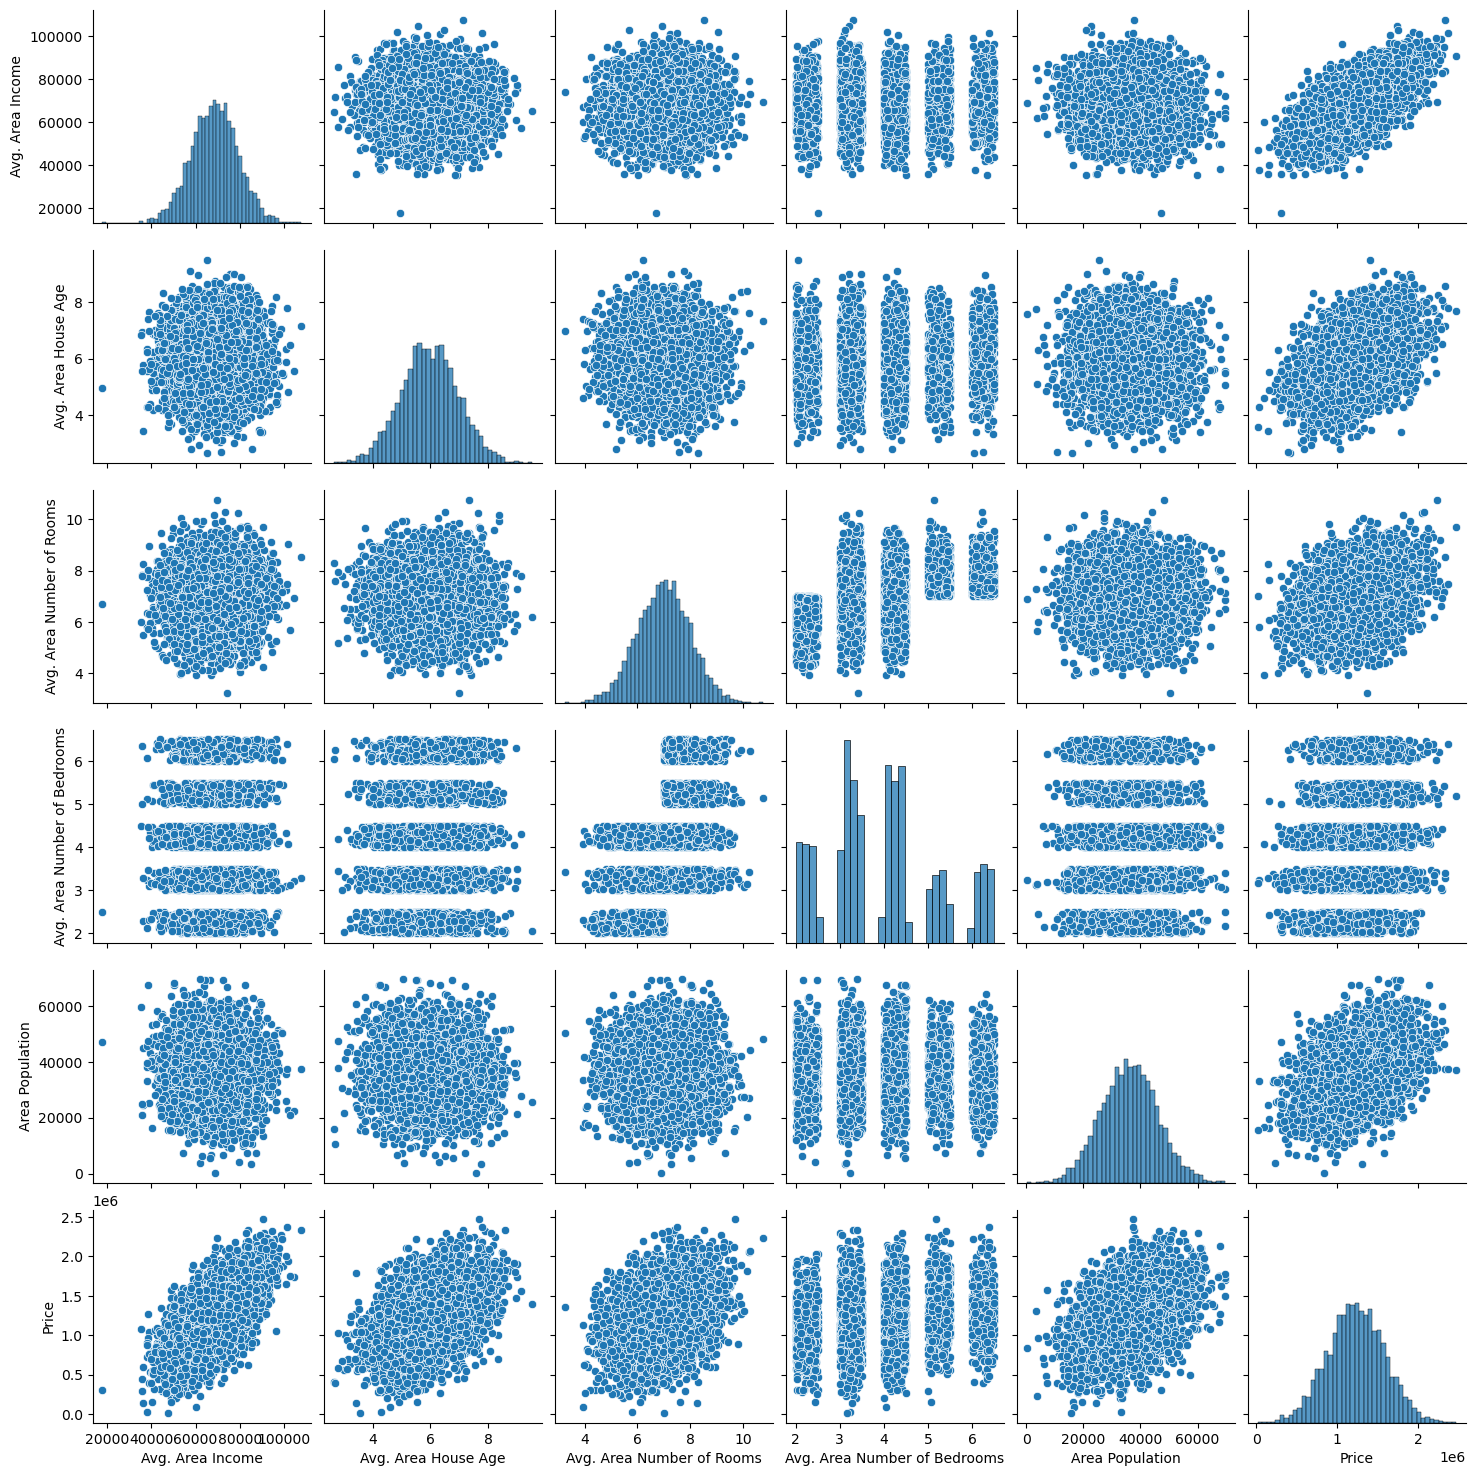

In [23]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

<Axes: xlabel='Price', ylabel='Density'>

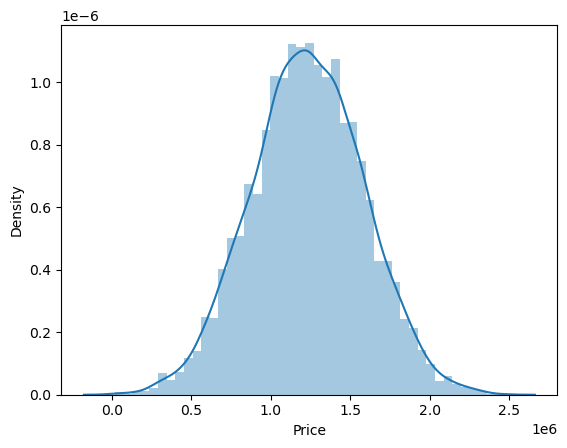

In [23]:
sns.distplot(df['Price'])

<Axes: xlabel='Avg. Area Income', ylabel='Price'>

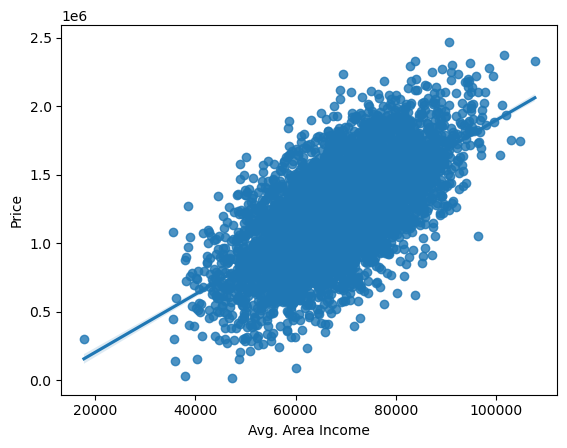

In [25]:
sns.regplot(y='Price', x='Avg. Area Income', data=df)

In [27]:
df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.0000,-0.0020,-0.0110,0.0198,-0.0162,0.6397
Avg. Area House Age,-0.0020,1.0000,-0.0094,0.0061,-0.0187,0.4525
Avg. Area Number of Rooms,-0.0110,-0.0094,1.0000,0.4627,0.0020,0.3357
Avg. Area Number of Bedrooms,0.0198,0.0061,0.4627,1.0000,-0.0222,0.1711
Area Population,-0.0162,-0.0187,0.0020,-0.0222,1.0000,0.4086
Price,0.6397,0.4525,0.3357,0.1711,0.4086,1.0000


<Axes: >

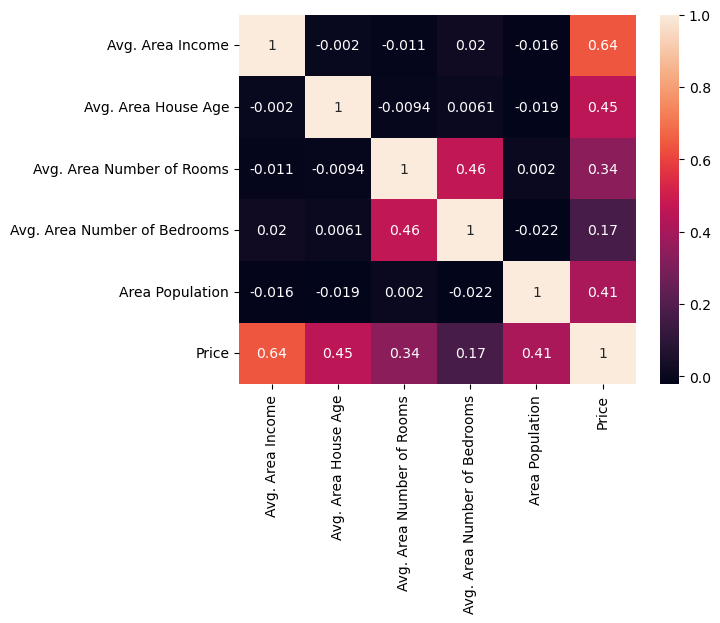

In [29]:
sns.heatmap(df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr(), annot=True)

In [31]:
df['House Age'] = df['Avg. Area House Age'].apply(int)

<Axes: xlabel='House Age', ylabel='Price'>

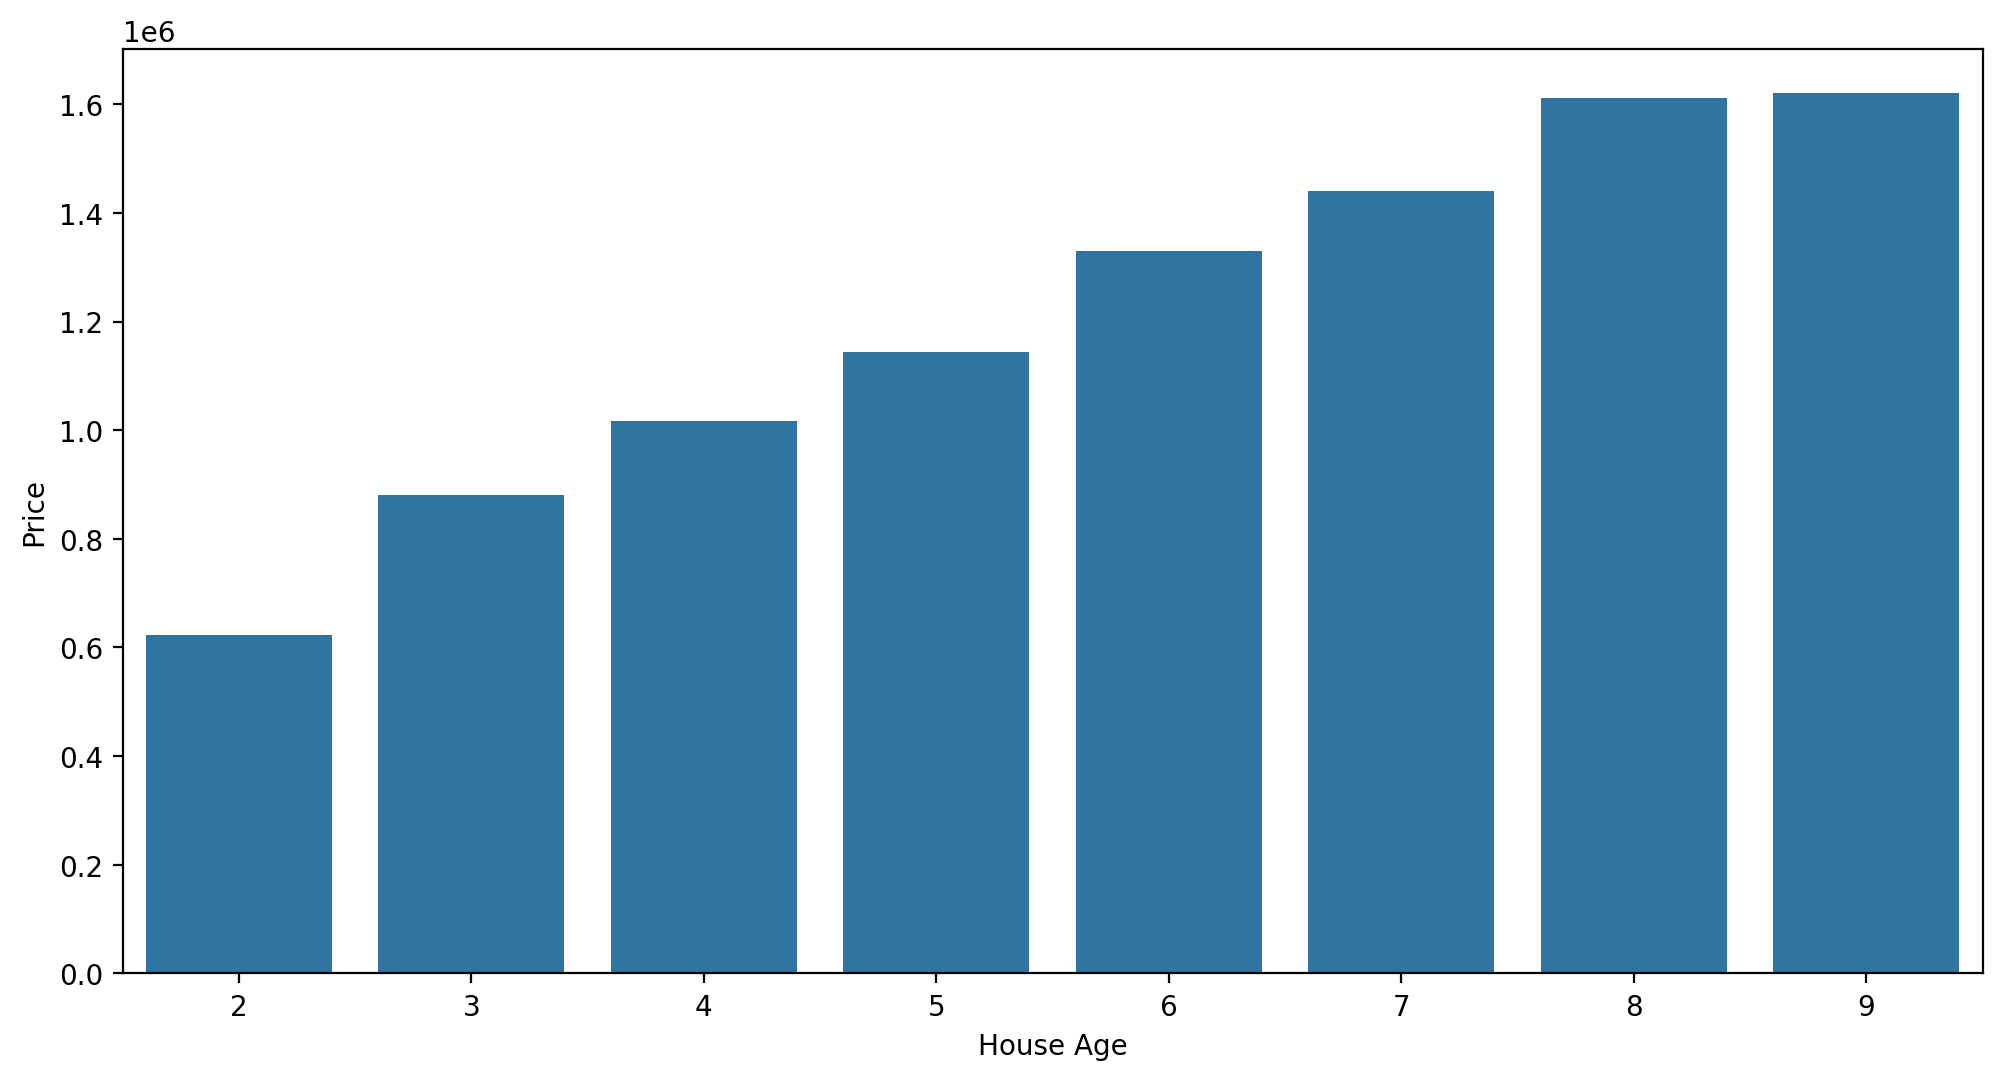

In [33]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'House Age', y = 'Price', data = df, ci = None)

In [35]:
df['Number of Rooms'] = df['Avg. Area Number of Rooms'].apply(int)

<Axes: xlabel='Number of Rooms', ylabel='Price'>

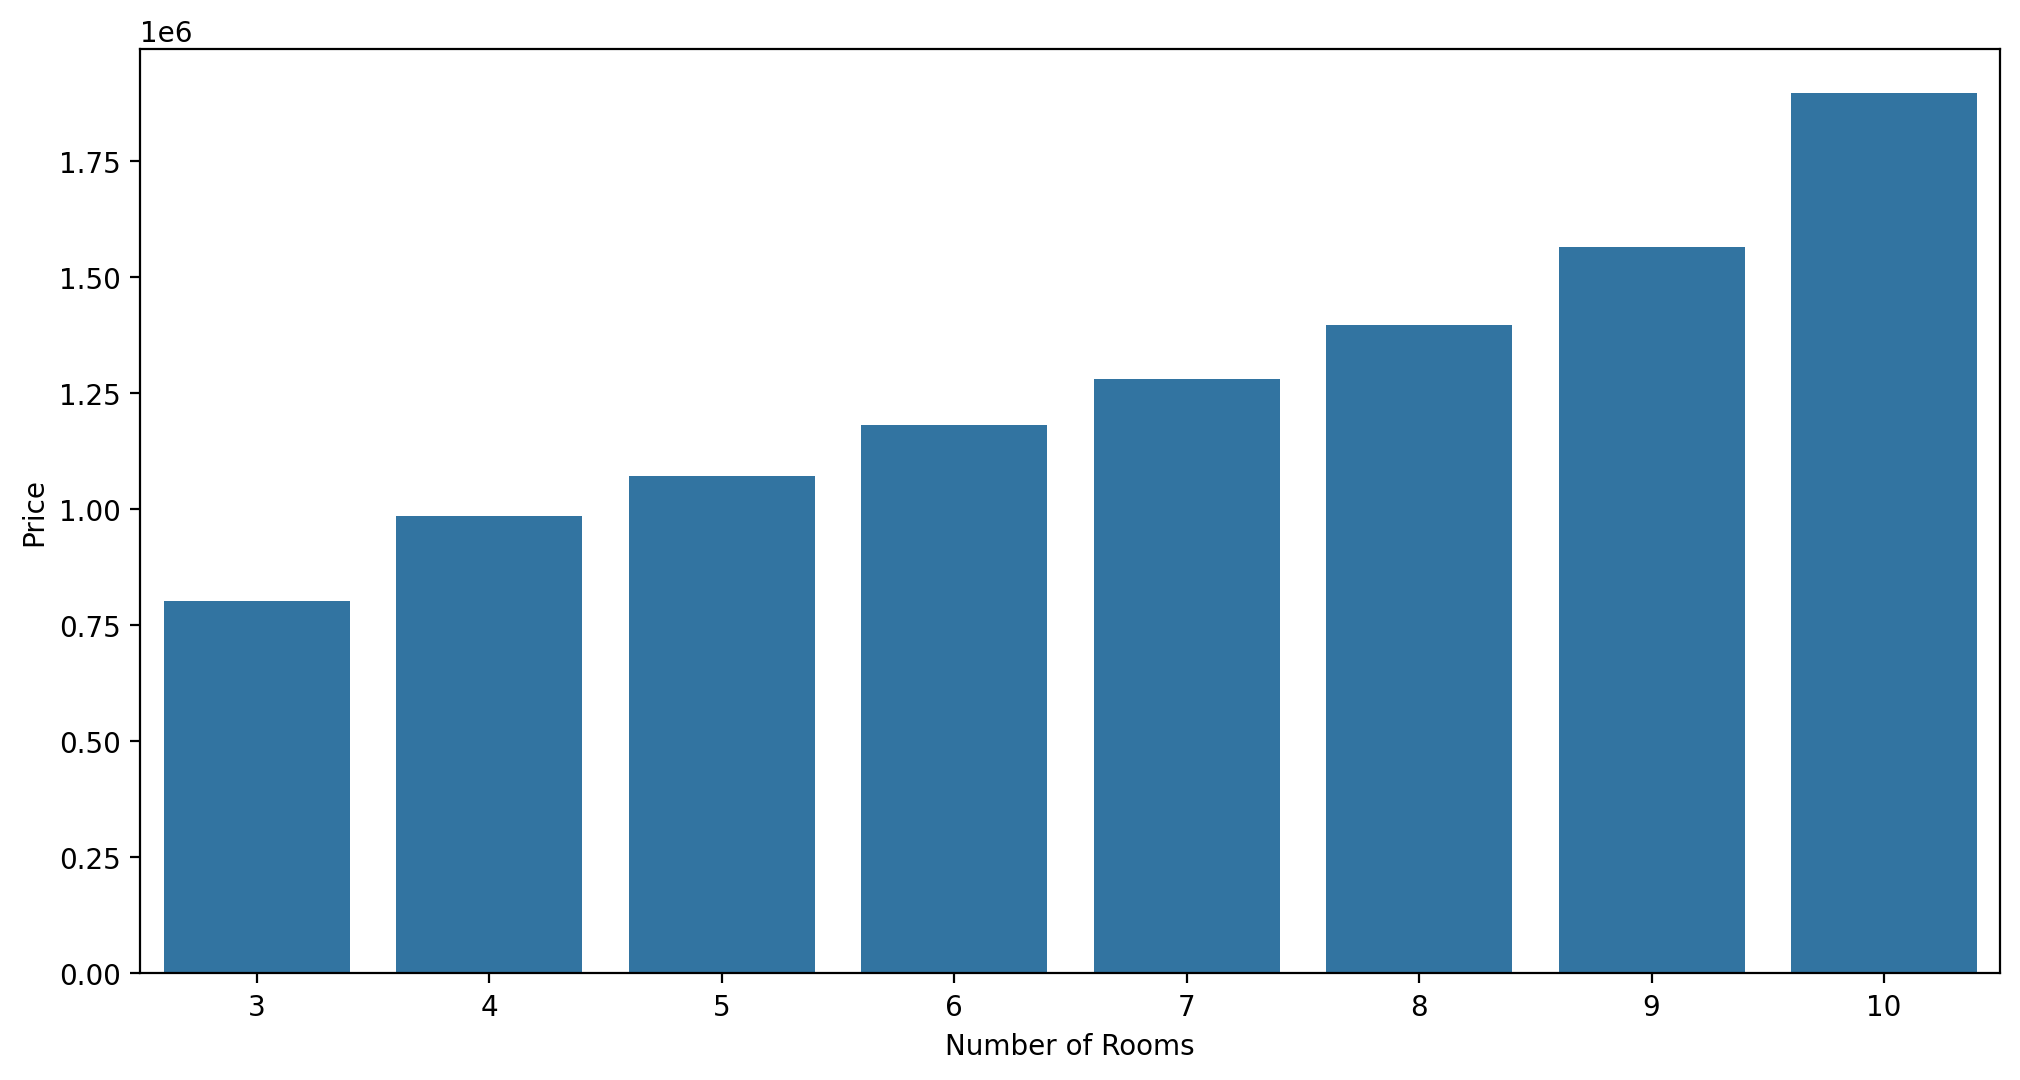

In [37]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Rooms', y = 'Price', data = df, ci = None)

In [38]:
df['Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].apply(int)

<Axes: xlabel='Number of Bedrooms', ylabel='Price'>

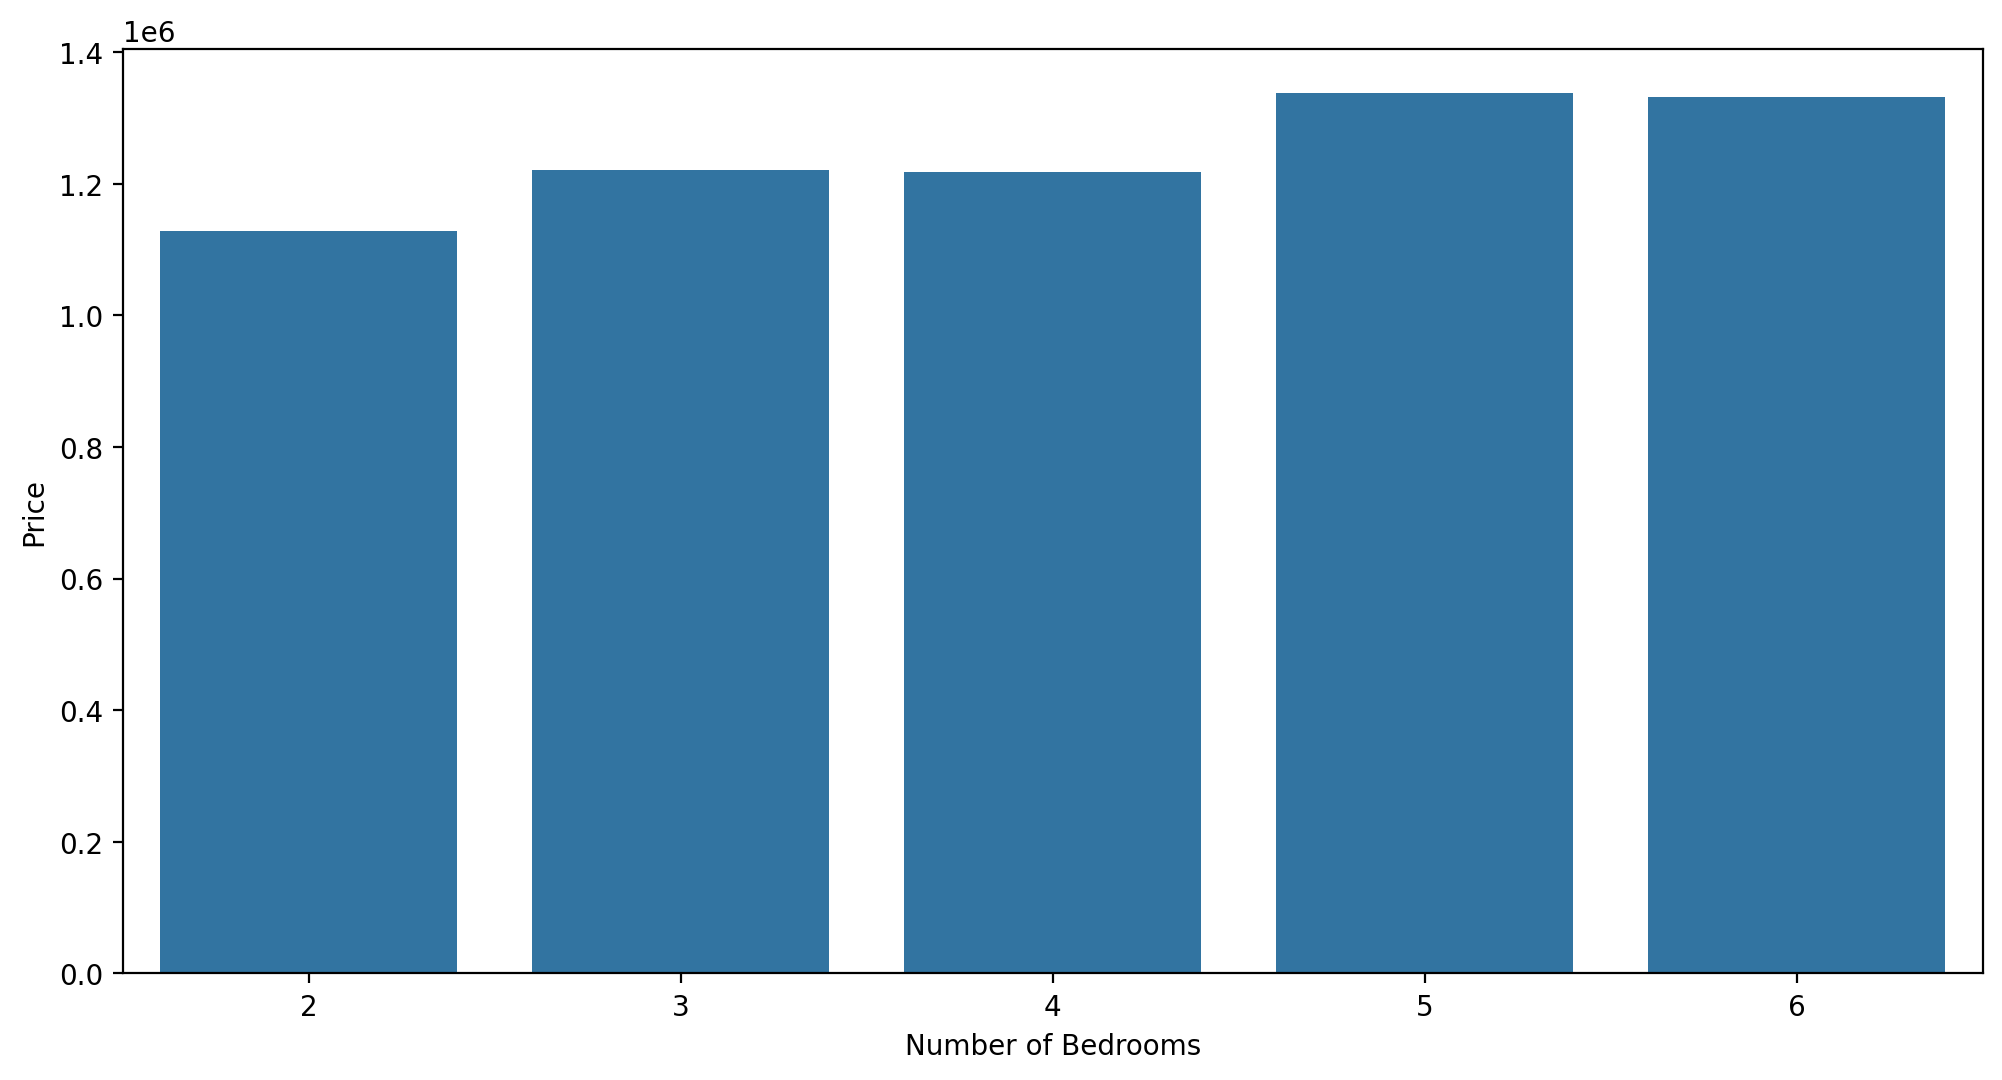

In [39]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Bedrooms', y = 'Price', data = df, ci = None)

### Обучение модели линейной регрессии

In [17]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [18]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [19]:
y = df['Price']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Линейная регрессия

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [24]:
lrm.intercept_

-2638673.4261914166

In [25]:
lrm.coef_

array([2.16257989e+01, 1.65590393e+05, 1.19827783e+05, 2.36109526e+03,
       1.52165814e+01])

In [26]:
predictions = lrm.predict(X_test)

In [27]:
predictions

array([1308536.13592619, 1237122.72746475, 1243835.62817066, ...,
       1457119.79297241, 1483428.95309368, 1047510.59737176])

In [28]:
y_test.round(3)

1501   1339096.0770
2586   1251794.1790
2653   1340094.9660
1055   1431507.6230
705    1042373.5240
           ...     
3563   1348221.7650
1538   1309937.3990
1837   1472887.2470
2380   1409762.1190
1912   1009606.2840
Name: Price, Length: 1500, dtype: float64

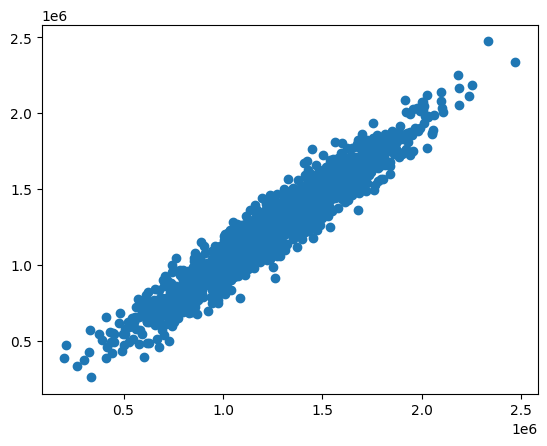

In [29]:
plt.scatter(y_test, predictions)

<Axes: xlabel='Price'>

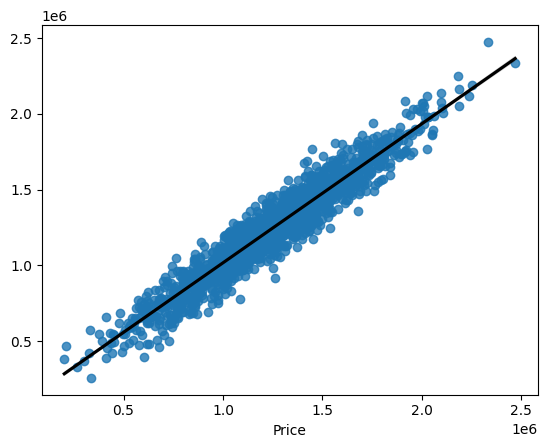

In [30]:
sns.regplot(x=y_test,y=predictions,line_kws={"color":"black"})

<Axes: xlabel='Price', ylabel='Density'>

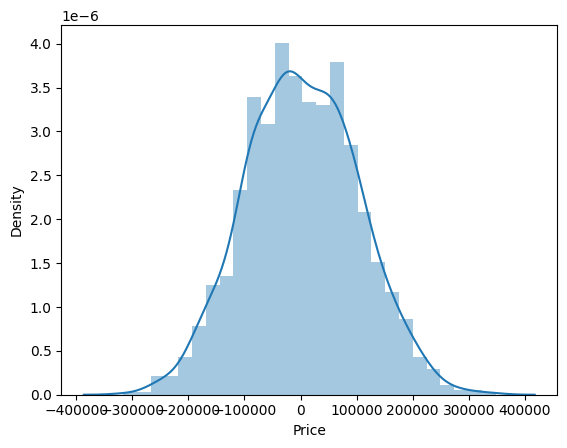

In [31]:
sns.distplot((y_test - predictions))

### Метрики оценки качества регрессии


Общие показатели оценки для задач регрессии:

**Mean Absolute Error** (MAE Средняя абсолютная ошибка) - это среднее значение абсолютного значения ошибок:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE Среднеквадратическая ошибка) - это среднее значение квадратов ошибок:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE Среднеквадратическая ошибка) - это квадратный корень из среднего квадрата ошибок:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Коэффициент детерминации** $R^{2}$

$$R^2 = 1 - \frac{\frac{1}{n}\sum^{n}_{i}{(y - y_{pred})^2}}{\frac{1}{n}\sum^{n}_{i}{(y - \bar{y})^2}}$$

In [32]:
from sklearn import metrics

In [33]:
metrics.mean_absolute_error(y_test, predictions)

81135.56609336905

In [34]:
metrics.mean_squared_error(y_test, predictions)

10068422551.401144

In [35]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

100341.52954485567

In [36]:
metrics.r2_score(y_test, predictions)

0.9146818498753994

### Обучение модели ансамблевого метода для предсказывания цены жилья

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import random

In [8]:
X = df.drop(['Address', 'Price'], axis=1)

In [9]:
y = df['Price']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Для моделей использующих разделение не нужно масштабировать данные

rf = RandomForestRegressor(       
    random_state=42,
    n_jobs=-1
)

params = {'n_estimators': [random.randint(64, 250)],
                        'max_depth': [None, 4, 8, 16],
                        'min_samples_split': [2, 4, 8]}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=params, cv=5, verbose=1)

random_search.fit(X_train, y_train)

y_pred_rf = random_search.predict(X_test)

best_n_estimators = random_search.best_params_['n_estimators']
best_max_depth = random_search.best_params_['max_depth']
best_min_samples_split = random_search.best_params_['min_samples_split']

# Print the results
print("Лучшее кол-во деревьев:", best_n_estimators)
print("Лучшая глубина:", best_max_depth)
print("Лучшее минималльное кол-во разделения:", best_min_samples_split)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Лучшее кол-во деревьев: 199
Лучшая глубина: 16
Лучшее минималльное кол-во разделения: 2


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R² Score: {r2:.4f}")

MAE: $94,348.13
RMSE: $118,928.09
R² Score: 0.8801


### Обучение модели нейросети для предсказывания цены жилья

In [13]:
# Импортируем необходимые библиотеки:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
# Стандартизация данных
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

X_val_scaled = scaler_X.transform(X_val)
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).flatten()

In [17]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, input_shape=(5,), activation='relu', name='input'),
        tf.keras.layers.Dense(32, activation='relu', name='hidden_1'),
        tf.keras.layers.Dense(16, activation='relu', name='hidden_2'),
        tf.keras.layers.Dense(1, name='output')
    ])

In [18]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse']
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 32)                192       
                                                                 
 hidden_1 (Dense)            (None, 32)                1056      
                                                                 
 hidden_2 (Dense)            (None, 16)                528       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 1793 (7.00 KB)
Trainable params: 1793 (7.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [19]:
# Обучение
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/200


88/88 [==============================] - 1s 3ms/step - loss: 0.5100 - mae: 0.5432 - mse: 0.5100 - val_loss: 0.1418 - val_mae: 0.3046 - val_mse: 0.1418
Epoch 2/200
88/88 [==============================] - 0s 1ms/step - loss: 0.1084 - mae: 0.2622 - mse: 0.1084 - val_loss: 0.0998 - val_mae: 0.2547 - val_mse: 0.0998
Epoch 3/200
88/88 [==============================] - 0s 1ms/step - loss: 0.0882 - mae: 0.2386 - mse: 0.0882 - val_loss: 0.0946 - val_mae: 0.2491 - val_mse: 0.0946
Epoch 4/200
88/88 [==============================] - 0s 1ms/step - loss: 0.0843 - mae: 0.2335 - mse: 0.0843 - val_loss: 0.0931 - val_mae: 0.2464 - val_mse: 0.0931
Epoch 5/200
88/88 [==============================] - 0s 1ms/step - loss: 0.0820 - mae: 0.2304 - mse: 0.0820 - val_loss: 0.0933 - val_mae: 0.2468 - val_mse: 0.0933
Epoch 6/200
88/88 [==============================] - 0s 1ms/step - loss: 0.0809 - mae: 0.2294 - mse: 0.0809 - val_loss: 0.0931 - val_mae: 0.2468 - val_mse: 0.0931
Epoch 7/200
88/88 [=

In [20]:
y_pred_scaled = model.predict(X_test_scaled).flatten()

47/47 [==============================] - 0s 609us/step


In [21]:
y_pred_scaled

array([ 0.18672298, -0.00652085,  0.06243321, ...,  0.64630914,
        0.5260691 , -0.6306752 ], dtype=float32)

In [22]:
# Обратное масштабирование цен
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_original, y_pred)
mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred)

print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R² Score: {r2:.4f}")

MAE: $82,628.65
RMSE: $102,934.36
R² Score: 0.9102


<Axes: >

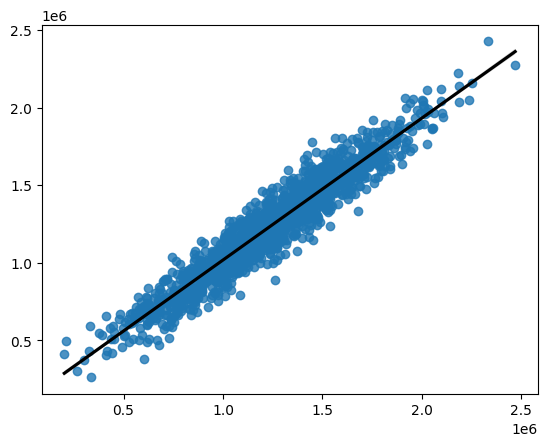

In [24]:
sns.regplot(x=y_test_original, y=y_pred, line_kws={"color":"black"})

<Axes: ylabel='Density'>

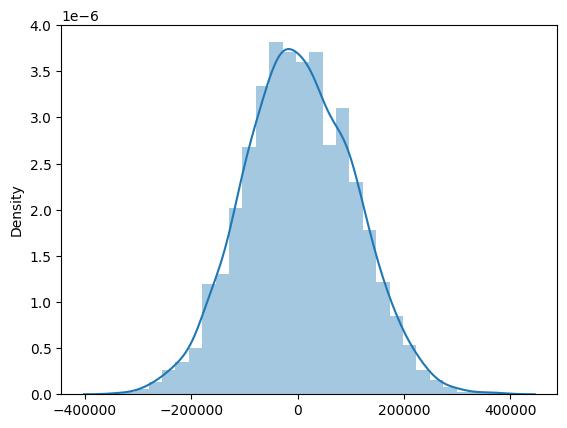

In [25]:
sns.distplot((y_test_original - y_pred))

### Вывод

В ходе работы была обучена модель на 4 слоях (по одной на входную и выходную и 2 скрытых). Датасет имел весьма разбросанные диапазоны данных. Самое важное: диапазон цены от 16.000 до 2.5 миллионов долларов. Данные масштабировались и былы позже отправлены в модель. За 33 эпохи модель обучилась до следующих метрик:
 * MAE (Средняя абсолютная ошибка): $82,628.65
   
 * RMSE (Среднеквадратическая ошибка): $102,934.36
 * R² Score: 0.9102

Также была создана модель ансамблевого метода со стандартными параметрами RandomForestRegressor, но с количеством деревьев 250. Результатов выше 0.88 по R² Score получить не удалось. Модель обучилась быстро и показывает следующие результаты
    
  * MAE: $94,082.51
    
  * RMSE: $118,813.88
    
  * R² Score: 0.8804